<a href="https://colab.research.google.com/github/AntonSangho/HT_jeju-g/blob/main/4_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0(csv)%EB%A5%BC_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B3%80%ED%99%94(txt)%ED%95%98%EA%B3%A0_chatgpt%EC%97%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D%EC%9A%94%EC%B2%AD%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공공데이터(csv)를 텍스트변화(txt)하고 chatgpt에 데이터 분석요청하기 🚀

## 1.CSV 파일 업로드
먼저 공공데이터포털에서 다운로드 받은 CSV 파일을 Colab에 업로드합니다.

In [ ]:
from google.colab import files
import pandas as pd

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일 이름 확인
file_name = list(uploaded.keys())[0]
print(f"업로드된 파일: {file_name}")

Saving data_public.csv to data_public.csv
업로드된 파일: data_public.csv


## 2.CSV 파일 읽기
업로드한 CSV 파일을 pandas로 읽어옵니다. 한글이 포함된 경우가 많으므로 인코딩을 설정합니다.

In [ ]:
# CSV 파일 읽기 (여러 인코딩 시도)
def read_csv_with_encoding(file_name):
    encodings = ['utf-8', 'cp949', 'euc-kr']

    for encoding in encodings:
        try:
            df = pd.read_csv(file_name, encoding=encoding)
            print(f"성공: {encoding} 인코딩으로 파일을 읽었습니다.")
            return df
        except UnicodeDecodeError:
            continue

    print("ERROR: 파일을 읽을 수 없습니다. 다른 인코딩을 시도해보세요.")
    return None

# 데이터 읽기
df = read_csv_with_encoding(file_name)

# 데이터 미리보기
if df is not None:
    print("\n데이터 미리보기:")
    display(df.head())

성공: cp949 인코딩으로 파일을 읽었습니다.

데이터 미리보기:


,연도,한국,일본,미국,대만,중국,홍콩,싱가포르,말레이시아,기타,담당부서,데이터기준일자
0,2013,8517417,128879,21439,38890,1812172,39761,56622,74956,161129,관광정책과,2023-12-31
1,2014,8945601,96519,19812,32189,2859092,28405,46307,63953,182039,관광정책과,2023-12-31
2,2015,11040135,59233,16898,17839,2237363,22732,29620,39892,200683,관광정책과,2023-12-31
3,2016,12249959,47997,33605,38046,3061522,44757,50566,66207,260321,관광정책과,2023-12-31
4,2017,13522632,55359,32651,28994,747315,48952,33732,49524,234077,관광정책과,2023-12-31


## 3️.ChatGPT용 텍스트 변환
데이터를 ChatGPT에 붙여넣기 쉬운 형태로 변환합니다.

In [ ]:
def convert_to_text(df, max_rows=10):
    # 컬럼명 추출
    columns = ", ".join(df.columns)

    # 처음 max_rows개의 행 선택
    sample_df = df.head(max_rows)

    # 데이터 행 변환
    rows = []
    for _, row in sample_df.iterrows():
        row_values = [str(val) for val in row]
        rows.append(", ".join(row_values))

    # 전체 데이터 정보
    total_info = f"전체 데이터 크기: {len(df)}행 × {len(df.columns)}열\n"

    # 최종 텍스트 조합
    text = f"{total_info}\n컬럼명:\n{columns}\n\n처음 {max_rows}개 행의 데이터:\n" + "\n".join(rows)

    return text

if df is not None:
    # 텍스트 변환
    text_data = convert_to_text(df)

    print("=== ChatGPT에 붙여넣을 수 있는 형태의 텍스트 ===\n")
    print(text_data)

    # 클립보드에 복사 (선택사항)
    try:
        from google.colab import output
        output.eval_js('navigator.clipboard.writeText(`' + text_data.replace('`', '\\`') + '`)')
        print("\n텍스트가 클립보드에 복사되었습니다!")
    except:
        print("\n위 텍스트를 복사하여 ChatGPT에 붙여넣으세요.")

=== ChatGPT에 붙여넣을 수 있는 형태의 텍스트 ===

전체 데이터 크기: 11행 × 12열

컬럼명:
연도, 한국, 일본, 미국, 대만, 중국, 홍콩, 싱가포르, 말레이시아, 기타, 담당부서, 데이터기준일자

처음 10개 행의 데이터:
2013, 8517417, 128879, 21439, 38890, 1812172, 39761, 56622, 74956, 161129, 관광정책과, 2023-12-31
2014, 8945601, 96519, 19812, 32189, 2859092, 28405, 46307, 63953, 182039, 관광정책과, 2023-12-31
2015, 11040135, 59233, 16898, 17839, 2237363, 22732, 29620, 39892, 200683, 관광정책과, 2023-12-31
2016, 12249959, 47997, 33605, 38046, 3061522, 44757, 50566, 66207, 260321, 관광정책과, 2023-12-31
2017, 13522632, 55359, 32651, 28994, 747315, 48952, 33732, 49524, 234077, 관광정책과, 2023-12-31
2018, 13089129, 86634, 31270, 51331, 666120, 49085, 28572, 68353, 263467, 관광정책과, 2023-12-31
2019, 13560004, 87975, 39827, 87981, 1079133, 56268, 26345, 67877, 280726, 관광정책과, 2023-12-31
2020, 10023678, 7638, 9696, 10185, 103288, 10168, 2680, 10092, 59020, 관광정책과, 2023-12-31
2021, 11960159, 972, 10746, 304, 6381, 191, 227, 763, 28694, 관광정책과, 2023-12-31
2022, 13803058, 3213, 12387, 2646, 9891, 1535, 

## 4️.ChatGPT 프롬프트 예시

위에서 생성된 텍스트를 포함하여 ChatGPT에 아래와 같이 요청할 수 있습니다:

[예시](https://chatgpt.com/share/672e3055-cb20-8002-836c-7704b92fc42f)
```
다음은 공공데이터포털에서 가져온 데이터의 일부입니다:

[위에서 생성된 텍스트를 여기에 붙여넣기]

이 데이터로 다음을 분석해주세요:
1. 기본적인 통계 분석
2. 데이터 시각화 코드
3. 주요 인사이트
```

## 📌 참고사항
- CSV 파일의 크기가 큰 경우, 일부 데이터만 샘플링하여 사용하세요
- 민감한 정보가 포함된 경우, 해당 열은 제외하고 전송하세요
- ChatGPT의 토큰 제한을 고려하여 적절한 크기로 데이터를 조절하세요

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and direc

## 5.***세션을 다시 시작*** 합니다.

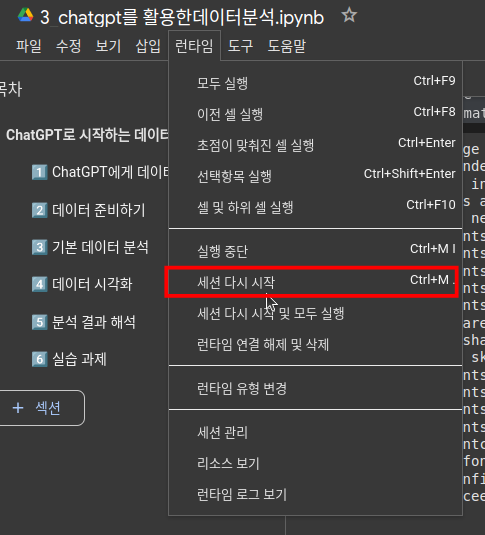

## 6.한글 폰트를 설치합니다.

In [ ]:
# 한글 폰트 설정을 위한 패키지 설치
!pip install koreanize-matplotlib

# 나눔 폰트 설치
import koreanize_matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.4 MB/s eta 0:00:00


## 7.ChatGPT가 생성한 코드를 실행해봅니다.


기본 통계 요약:
                연도            한국            일본            미국           대만  \
count    10.00000  1.000000e+01      10.00000     10.000000     10.00000   
mean   2017.50000  1.167118e+07   57441.90000  22833.100000  30840.50000   
std       3.02765  1.956669e+06   43616.42428  10783.203342  26097.96793   
min    2013.00000  8.517417e+06     972.00000   9696.000000    304.00000   
25%    2015.25000  1.027779e+07   17727.75000  13514.750000  12098.50000   
50%    2017.50000  1.210506e+07   57296.00000  20625.500000  30591.50000   
75%    2019.75000  1.341426e+07   87639.75000  32305.750000  38679.00000   
max    2022.00000  1.380306e+07  128879.00000  39827.000000  87981.00000   

                 중국            홍콩         싱가포르         말레이시아             기타  
count  1.000000e+01     10.000000     10.00000     10.000000      10.000000  
mean   1.258228e+06  30185.400000  28754.10000  44500.200000  171067.300000  
std    1.163484e+06  20746.176543  19257.92213  29299.950378   96300.1

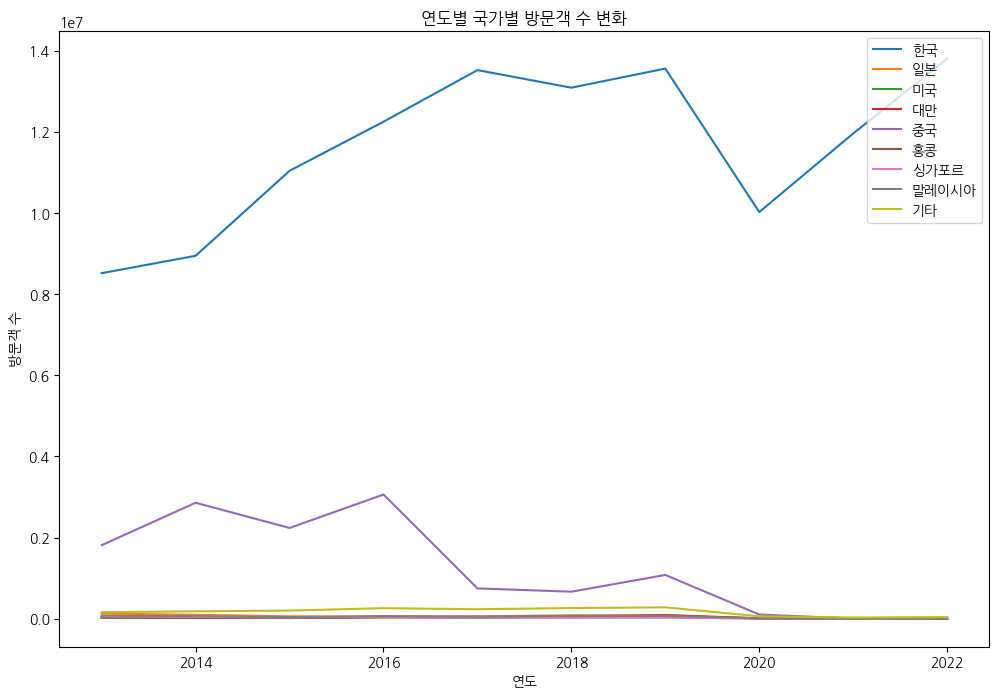

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 데이터프레임 생성 (사용자 데이터 예시 적용)
data = {
    '연도': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    '한국': [8517417, 8945601, 11040135, 12249959, 13522632, 13089129, 13560004, 10023678, 11960159, 13803058],
    '일본': [128879, 96519, 59233, 47997, 55359, 86634, 87975, 7638, 972, 3213],
    '미국': [21439, 19812, 16898, 33605, 32651, 31270, 39827, 9696, 10746, 12387],
    '대만': [38890, 32189, 17839, 38046, 28994, 51331, 87981, 10185, 304, 2646],
    '중국': [1812172, 2859092, 2237363, 3061522, 747315, 666120, 1079133, 103288, 6381, 9891],
    '홍콩': [39761, 28405, 22732, 44757, 48952, 49085, 56268, 10168, 191, 1535],
    '싱가포르': [56622, 46307, 29620, 50566, 33732, 28572, 26345, 2680, 227, 12870],
    '말레이시아': [74956, 63953, 39892, 66207, 49524, 68353, 67877, 10092, 763, 3385],
    '기타': [161129, 182039, 200683, 260321, 234077, 263467, 280726, 59020, 28694, 40517]
}

df = pd.DataFrame(data)

# 한글 폰트 설정 (Mac용 폰트 설치법, Windows의 경우 'Malgun Gothic'으로 변경)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

# 통계 분석 (간단한 평균, 최대값, 최소값 구하기)
summary_stats = df.describe()

# 결과 출력
print("기본 통계 요약:\n", summary_stats)

# 시각화
plt.figure(figsize=(12, 8))
for country in ['한국', '일본', '미국', '대만', '중국', '홍콩', '싱가포르', '말레이시아', '기타']:
    plt.plot(df['연도'], df[country], label=country)

plt.xlabel('연도')
plt.ylabel('방문객 수')
plt.title('연도별 국가별 방문객 수 변화')
plt.legend(loc='upper right')
plt.show()
